In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

In [23]:
data = pd.read_csv('./data_ML/student.csv')
data.head()


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


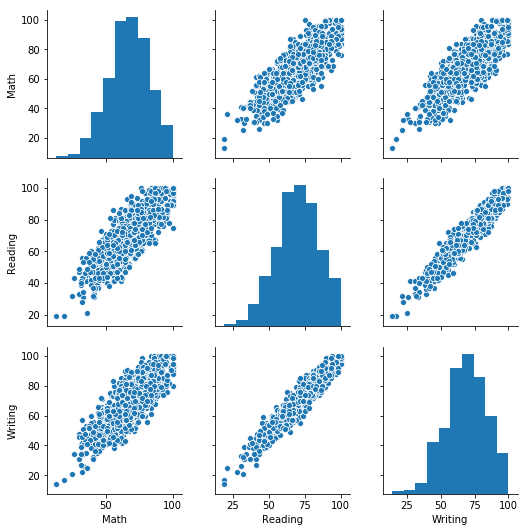

In [24]:
import seaborn as sns# Create the default pairplot
sns.pairplot(data)

In [25]:
data.shape

(1000, 3)

In [26]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

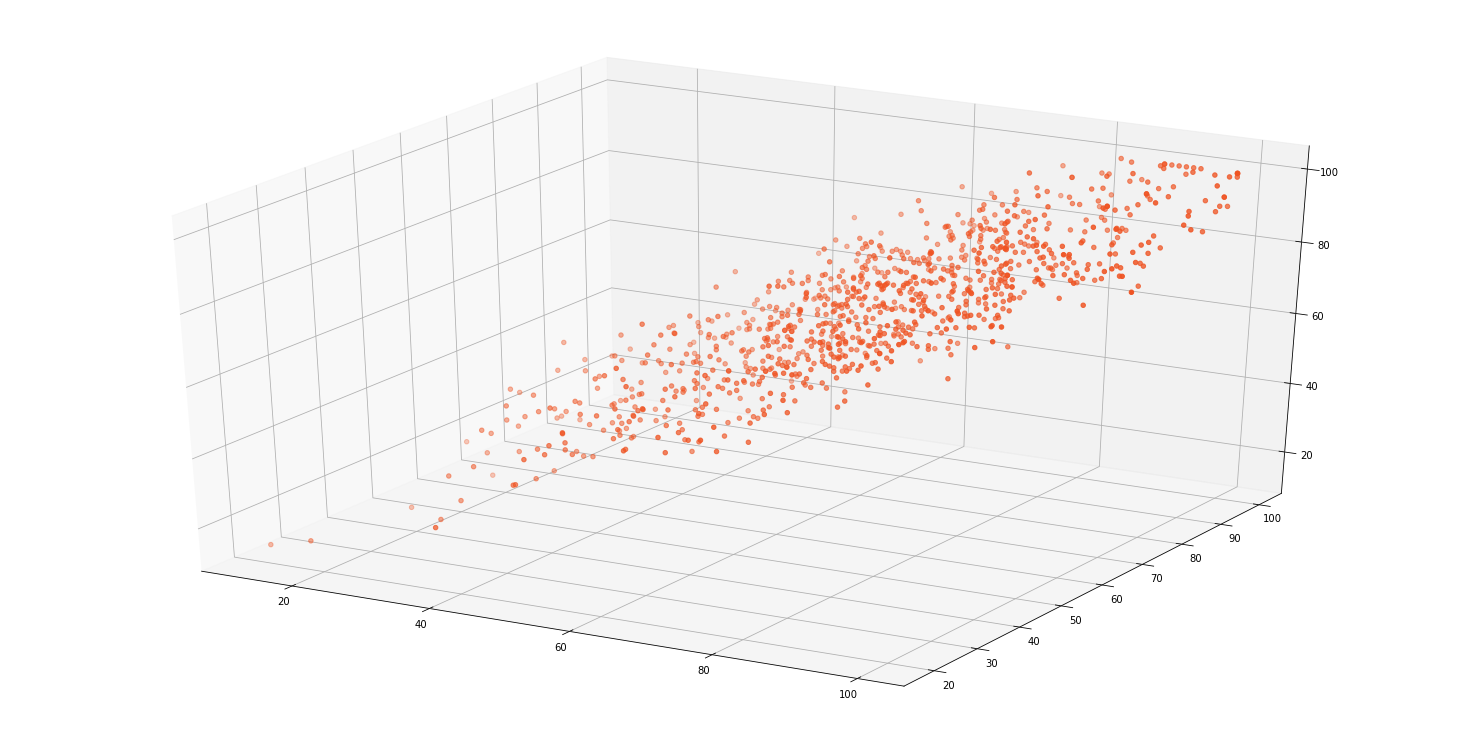

In [27]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='#ef5423')
plt.show()

In [28]:
#let  us  try  to predict writing using math  and reading

m = len(math)
x0 = np.ones(m)
X = np.array([x0, math, read]).T
B = np.array([0, 0, 0])
Y = np.array(write)
alpha = 0.0001
print(X)

[[ 1. 48. 68.]
 [ 1. 62. 81.]
 [ 1. 79. 80.]
 ...
 [ 1. 89. 87.]
 [ 1. 83. 82.]
 [ 1. 66. 66.]]


In [30]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [31]:
cost_function(X, Y, B)

2470.11

In [32]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        h = X.dot(B)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [33]:
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

In [34]:
cost_history[-1]

10.475123473539169

In [35]:
newB

array([-0.47889172,  0.09137252,  0.90144884])

In [36]:
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

In [37]:
Y_pred = X.dot(newB)

In [38]:
rmse(Y, Y_pred)

4.577143972727789

In [39]:
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [40]:
r2_score(Y, Y_pred)

0.9097223273061553

In [42]:
#Now we try  to separate unknown tests and known training data

from sklearn.model_selection import train_test_split
#math = data['Math'].values
#read = data['Reading'].values
#write = data['Writing'].values
X_full = data[["Math","Reading"]].values
y_full = write
X, X_test, y, y_test = train_test_split(X_full, y_full, test_size=0.30, random_state=42)


mm = len(y)
x0 = np.ones(mm)
print(x0.shape, X[:,1].shape)
X = np.array([ x0, X[:,0], X[:,1] ]).T

B = np.array([0, 0, 0])
y = np.array(y)

(700,) (700,)


In [43]:
newB2, cost_history2 = gradient_descent(X, y, B, alpha, 100000)

print(X_test.shape)
mmm = len(y_test)
x0 = np.ones(mmm)
X_test = np.array([ x0, X_test[:,0], X_test[:,1] ]).T
Y_pred2 = X_test.dot(newB2)
r2_score(y_test, Y_pred2)

(300, 2)


0.9085733147638112